# NEURAL NETWORKS

## An Artificial Neuron

*An artificial neuron is made up of the following*
- *Input Nodes*
- *Weights*
- *Activation Function*
- *Output Node*

<br>

*Every input node of an artificial neuron has a weight attached to it which scales the input at the input node*

<br>

*An artificial neuron via its weights and input nodes computes a weighted sum of the inputs present at the input nodes. This weighted sum is then applied to an activation function $f$, which can be linear or non-linear. The result of the activation function on the weighted sum produces the output at the output node*
*Mathematically an artificial neuron carries out the operation:*
$$ y = f(\sum^m_{i=1}\, w_{i}x_{i}) $$
$$ x_{i}: input\ at\ input\ node\ i $$
$$ w_{i}: weight\ for\ input\ node\ i$$
$$ f: activation\ function\ $$
$$ y: output\ at\ output\ node $$

*An artificial neuron can be linear or non-linear depending on the nature of the activation function being used, an example linear activation function is a scaling function and an example non-linear function is the sigmoid function to be discussed in the next module*

## Modelling A Linear Discrete Time (Dynamic) System Using A Linear Neuron
In what follows, we will motivate a number of important concepts related to the gradient descent method using an illustrative problem.

Lets assume we are given a set of data $\{u_k,y_k\}$. That is, a dataset with two columns. One column could be time, and the other, temperature. Perhaps, the first could be a variable that affects the stock price of Tesla, while the other is the stock price itself. In other words, the two columns might represent any two variables that are related. We intend to find that relationship using system identification.

A very critical first step is to determine a model structure that might accrately model the data. This usually requires some knowledge about the system, or a similar system. Such a knowledge allows us to predict a GENERAL form for the model.

Suppose that, for our sample problem, we have reason to believe that it can be modelled as a linear, discrete time dynamic system described by:
$$ y(k) = a_{1}\,y(k-1) + a_{2}\,y(k-2) + b_{1}\,u(k-1)$$ 

*A linear neuron having three input nodes can model the systems behaviour by assigning weights of the neuron as coefficients of the system and corresponding neuron input nodes as corresponding independent variables of the system This is done by making:*
$$ w_{1} = b_{1} $$
$$ w_{2} = a_{1} $$
$$ w_{3} = a_{2} $$
$$ x_{1} = u(k-1) $$
$$ x_{2} = y(k-1) $$
$$ x_{3} = y(k-2) $$

*Given that we have example inputs and output from the linear discrete dynamic system, how do we make sure that the linear neuron, for a set of example inputs produces an output close to the corresponding example output*

*The inputs to the linear neuron cannot be altered, but the corresponding outputs can be altered by altering the weights of the linear neuron. So the question is how do we change the weights such that the output of the linear neuron is close to the actual example output as much as possible. We are basically saying how can the linear neuron learn the best weight values that fits the example behaviour of the discrete dynamic system*

*Generally methods for a linear neuron to learn these weights are called weight update rules or learning rules. The most common of these rules which will be used during this course is called the gradient descent rule, we discuss the gradient descent rule, but first let us generate an example(training) data from a discrete dynamic system  we intend to model using a linear neuron*

*First, we are going to generate a dataset. We will do so deterministically, so that we can determine at the end of the Lab whether our model is correct. Mote that in real life, even though YOU will usually not generate the data analytically (rather, obtaining them experimentally, or from a third party), there would nonetheless be an underlying relationship. The only difference is that in this case, we wish to generate the data analytically so we can see how well the gradient descent algorithm performs.

***TODO: Run the cell below to generate the dataset on which we wish to carry out system identification:***

In [1]:
import numpy as np
import pandas as pd
import random

number_of_samples = 1000
#np.random.seed(40)
#random.seed(40)

# generate the coefficients of the real system randomly
#b1, a1, a2 = np.random.uniform(0.1, 0.4, size=3)
#b1, a1, a2 = round(b1, 2), round(a1, 2), round(a2, 2)  # round to 2 decimal places

b1, a1, a2 = 0.21, 0.15, 0.38


# generate the input column
u = np.random.rand(number_of_samples)
u = np.round(u, decimals=2)

# create and populate Y
y = np.zeros(number_of_samples)
for k in range(2,number_of_samples):
    y[k] = a2 * y[k-2] + a1*y[k-1] + b1* u[k-1]

supplied_dataset = pd.DataFrame({'Input(u)': u, 'Output(y)': y})

# display the weights and the dataset
print(f'Weights b1, a1, a2, b1 are: {b1}, {a1}, {a2}.')
supplied_dataset

Weights b1, a1, a2, b1 are: 0.21, 0.15, 0.38.


,Input(u),Output(y)
0,0.57,0.000000
1,0.61,0.000000
2,0.23,0.128100
3,0.68,0.067515
4,0.58,0.201605
...,...,...
995,0.46,0.168957
996,0.02,0.193505
997,0.77,0.097429
998,0.29,0.249846


Now, we have a dataset, which in real life, would have been the starting point of this system identification assignment. Carefully note the weights that were used to generate this dataset. They are the "true" underlying dynamics of the system (which, to stress again, you would generally NOT know in real life).

Given this dataset, you somehow guessed that it could be modelled as $ y(k) = a_{1}\,y(k-1) + a_{2}\,y(k-2) + b_{1}\,u(k-1)$. We now want to see how to use gradient descent to determine the values of the weight.

***TODO: Run the cell below to generate a re-organize the training data:***

In [2]:
# generate examples(training data)

# our dataset has just two columns (one 'input', one 'output'), but the neuron model we want to use has three inputs and one output. We need to re-structure the data for easy computations.


#N = 1000
x = np.zeros((3,number_of_samples))
#X[0,0] = random.random() #u
#X[1,0] = random.random() #y(k-1)
#X[2,0] = random.random() #y(k-2)

for n in range(number_of_samples-1):
    #X[3,n] = y[n] #y(k)
    x[0,n+1] = u[n]     #u(k-1)
    x[1,n+1] = y[n]     #y(k-1)
    if(n<number_of_samples-2):
        x[2,n+2] = y[n]  #y(k-2)


inputs = pd.DataFrame(x.T,columns=["u(k-1)","y(k-1)","y(k-2)"])
outputs = pd.DataFrame(y, columns=["y"])

inputs


,u(k-1),y(k-1),y(k-2)
0,0.00,0.000000,0.000000
1,0.57,0.000000,0.000000
2,0.61,0.000000,0.000000
3,0.23,0.128100,0.000000
4,0.68,0.067515,0.128100
...,...,...,...
995,0.48,0.188319,0.105023
996,0.46,0.168957,0.188319
997,0.02,0.193505,0.168957
998,0.77,0.097429,0.193505


## Notations and Symbols

$ y(k):$ actual output from system at timestep k

$ y^{pred}(k):$ output computed by the neuron at timestep k

## Cost Function

*Since we are trying to alter the weights of the linear neuron such that $y^{pred}(k)$ is as close to $y(k)$ as possible, then based on the distance:*
$$y(k)-y^{pred}(k)$$
*we should be able to determine in what manner and to what extent we should alter the weights of the neuron.*

*There should be a measure of this distance which depends on the weights of the neuron. This measure of distance is called the cost function and is defined as:*
$$ E = \frac{1}{2}\sum^{N-1}_{k=0}\,e_{k} = \frac{1}{2}\sum^{N-1}_{k=0}\,(y(k)-y^{pred}(k))^2 $$

*where:*
$$ e_{k} = (y(k)-y^{pred}(k))^2 : error\ for\ each\ example $$
$$ E: Average\ error\ on\ all\ examples $$

*Cost function $E$ depends on the weights through $y^p(k)$ which is computed as:*
$$ y^{pred}(k) = \sum^m_{i=1}\,w_{i}x_{i}(k) $$

## Gradient Descent Rule

*Gradient descent acts to arrive at the optimal weight values by measuring the changes in the cost function value $E$ due to changes in the weights. This is done through the gradients:*
$$ \frac{\partial{E}}{\partial{w_{i}}} ; i=1,2,.....,m $$

*Then from these gradients the manner in which each weight should be altered is determined*

#### Form of the weight update rule

*A positive gradient indicates that the weight should be reduced to reduce the cost function and a negative gradient indicates that the weight should increased to reduce the cost function, thus the form of the weight update rule that achieves this. For each weight:*
$$ w^{new}_{i} = w^{old}_{i} - \eta\frac{\partial{E}}{\partial{w_{i}}} $$
$$ \eta: learning\ rate $$

*The learning rate determines by what amount the weight is increased or reduced accordingly*

#### Computing the gradient

*How do we compute the gradient $\frac{\partial{E}}{\partial{w_{i}}}$*
$$ E = \frac{1}{2}\sum^{N-1}_{k=0}\,e_{k} = \frac{1}{2}\sum^{N-1}_{k=0}\,(y(k)-y^{pred}(k))^2 \\$$
$$ y^{pred}(k) = \sum^m_{i=1}\,w_{i}x_{i}(k) \\$$
$$ \therefore \frac{\partial{E}}{\partial{w_{i}}} = \frac{\partial{E}}{\partial{y^p}} * \frac{\partial{y^p}}{\partial{w_{i}}} \hspace{0.5in} i=1,......,m $$

*We can thus find the gradients to be:*
$$ \frac{\partial{E}}{\partial{y^p}} = -\sum^{N-1}_{k}\,y(k)-y^{pred}(k) \hspace{0.5 in} and $$
$$ \frac{\partial{y^p}}{\partial{w_{i}}} = x_{i}(k) $$
$$ \therefore \frac{\partial{E}}{\partial{w_{i}}} = -\sum^{N-1}_{k}\,(y(k)-y^{pred}(k))x_{i}(k) $$

*We can say that*
$$ \delta(k) = (y(k)-y^{pred}(k)) $$
$$ \therefore \frac{\partial{E}}{\partial{w_{i}}} = -\sum^{N-1}_{k}\,\delta(k)x_{i}(k) $$

## Fitting The Neuron Weights

*Now that we have the cost function, weights and gradient of the cost function with respect to the weights, how do we use all of this to fit neuron weights*

*There are two ways to this, one is called the instantaneous leaning and the other is called batch learning or update.*

*What we have described so far implements batch update(learning). Let us explain how to implement this*

#### Batch update(learning)
1. *Initialize your weights to random values between 0 and 1.*
2. *Compute the outputs $y^{pred}(k)$ for all examples $k$.*
3. *Compute the gradient of the cost function with respect to each weight $\frac{\partial{E}}{\partial{w_{i}}} (i=1,...,m)$  from all $y^{pred}(k), y(k)\ and\ w_{i}$.*
4. *Update each weight from its old value and cost function gradient using the weight update rule*
5. *Recompute the outputs $y^{pred}(k)$ for all examples $k$ and evaluate the cost function $E$ from all $y^{pred}(k)\ and\ y(k)$*
6. *Go through steps 2 to 5 again until certain pre-defined iteration steps is complete or until the cost function $E$ is at its minimum and no longer changing*

*Let us implement this batch update and try it out on our example training data generated previously*

*We use the mean squared error from scikit learn as a means to verify that the direction of the cost function is valid, the mean squared error is a valid measure of cost*

*Try writing the instantaneous update method algorithm in python and matlab on your own*

Progress: 10 %
Progress: 20 %
Progress: 30 %
Progress: 40 %
Progress: 50 %
Progress: 60 %
Progress: 70 %
Progress: 80 %
Progress: 90 %
Progress: 100 %


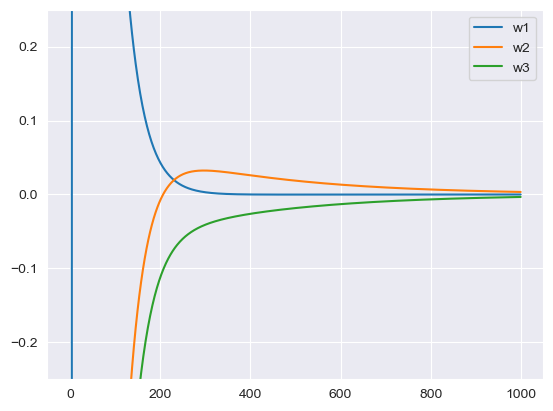

Errors at last iteration:[-3.01681953e-05  3.41778282e-03 -3.35388842e-03]
Weights obtained by System Identification:[0.21 0.15 0.38]
Remember, the real system coefficients b1, a1, a2, b1 are: 0.21, 0.15, 0.38.


In [3]:
from matplotlib import pyplot as plt

w = [0.1,0.6, 0.9]
#w = np.random.randn(3)
eta = 0.001
number_of_iterations = 1000
ypred = np.zeros(number_of_samples)
error_series = []
progress_counter = 0


history = {
    'E':[],
    'weights':[]
}


for q in range(number_of_iterations):
    gradient_per_iteration = np.zeros(3)
    local_error = [0,0,0]           # initialize the error for this entire iteration through the whole dataset

    for k in range(2, number_of_samples):                       # run through the whole dataset for this iteration, q
        ypred[k] = w[0]*x[0, k] + w[1]*x[1,k] + w[2]*x[2, k]    # predict a value for this particular kth value of the various inputs
        for i in range(3):
            #local_error[i] = (y[k]-ypred[k])*x[i, k]            # the local gradient for the ith input
            gradient_per_iteration[i] = gradient_per_iteration[i] + (y[k]-ypred[k])*x[i, k]

    for i in range(3):
        w[i] = w[i] + (gradient_per_iteration[i]*eta)


    # record data for plotting after everything
    error_series.append([gradient_per_iteration[0], gradient_per_iteration[1], gradient_per_iteration[2]])
    history['E'].append(gradient_per_iteration)
    history['weights'].append(w)

    # this block is just to allow a progress report
    if q%(number_of_iterations/10)==0:
        progress_counter+=10
        print(f'Progress: {progress_counter} %')





history['weights'] = np.array(history['weights'])
history['E'] = np.array(history['E'])
plt.plot(error_series)#, error_sum[1], error_sum[2])
plt.ylim(-0.25, 0.25)
plt.legend(['w1', 'w2','w3'])
plt.show()

print("Errors at last iteration:"+str(gradient_per_iteration))
print("Weights obtained by System Identification:"+str(np.round(w, decimals=2)))
print(f'Remember, the real system coefficients b1, a1, a2, b1 are: {b1}, {a1}, {a2}.')

#### DIY


1. Modify the eta in the code above to 0.1, while leaving the number of iterations as 1000.
    Q: what do you observe? What do you think is responsible for this?
2. Modify the eta, using 0.00001 instead now. Leave the number of iterations at 1000. Run the code again, noting how fast the weights drop
3. Finally leave the eta at 0.00001, and increase the number of iterations to 10000. What are your observations?
    Q: from the above, what can you conclude about using an excessively high $\eta$ ?
    Q: what do you think prevents us from just using arbitrarily high number of iterations?
    Q: Can you think  of a way to achieve the highest possible value of $\eta$ and the lowest number of iterations that would converge rapidly to the right weights?
4. The above code starts with random weights. There is a commented-out line that allows you to start with specified values. Play with that, and observe the effect. Stay between 0 and 1. Try something out of that range, and see what happens.

### Stochastic Gradient Descent
In updating weights, the last gradient descent code used the entire dataset to compute the gradient.
There is a slightly different version in which the weights are updated more rapidly, as explaied in the slides. As an assignment, modify the code, to update the weights more rapidly as discussed in the slides.

In [ ]:
## To modify


w = [0.1,0.6, 0.9]
#w = np.random.randn(3)
eta = 0.001
number_of_iterations = 1000
ypred = np.zeros(number_of_samples)
error_series = []
progress_counter = 0


history = {
    'E':[],
    'weights':[]
}


for q in range(number_of_iterations):
    gradient_per_iteration = np.zeros(3)
    local_error = [0,0,0]           # initialize the error for this entire iteration through the whole dataset

    for k in range(2, number_of_samples):                       # run through the whole dataset for this iteration, q
        ypred[k] = w[0]*x[0, k] + w[1]*x[1,k] + w[2]*x[2, k]    # predict a value for this particular kth value of the various inputs
        for i in range(3):
            #local_error[i] = (y[k]-ypred[k])*x[i, k]            # the local gradient for the ith input
            gradient_per_iteration[i] = gradient_per_iteration[i] + (y[k]-ypred[k])*x[i, k]

    for i in range(3):
        w[i] = w[i] + (gradient_per_iteration[i]*eta)


    # record data for plotting after everything
    error_series.append([gradient_per_iteration[0], gradient_per_iteration[1], gradient_per_iteration[2]])
    history['E'].append(gradient_per_iteration)
    history['weights'].append(w)

    # this block is just to allow a progress report
    if q%(number_of_iterations/10)==0:
        progress_counter+=10
        print(f'Progress: {progress_counter} %')





history['weights'] = np.array(history['weights'])
history['E'] = np.array(history['E'])
plt.plot(error_series)#, error_sum[1], error_sum[2])
plt.ylim(-0.25, 0.25)
plt.legend(['w1', 'w2','w3'])
plt.show()

print("Errors at last iteration:"+str(gradient_per_iteration))
print("Weights obtained by System Identification:"+str(np.round(w, decimals=2)))
print(f'Remember, the real system coefficients b1, a1, a2, b1 are: {b1}, {a1}, {a2}.')